# Linear Regression from Scratch: Boston Housing Dataset

## Objective:
1. Perform a detailed exploratory data analysis (EDA) to uncover patterns and relationships in the Boston Housing Dataset.
2. Implement Linear Regression using mathematical principles from scratch.
3. Evaluate and visualize the model's performance.

## Dataset Overview:
This dataset contains information collected by the U.S. Census Service concerning housing in the Boston area. It has 506 rows and 14 attributes, with `MEDV` (Median Value of Owner-Occupied Homes) as the target variable.

### Key Features:
- `CRIM`: Per capita crime rate by town.
- `ZN`: Proportion of residential land zoned for lots over 25,000 sq. ft.
- `INDUS`: Proportion of non-retail business acres per town.
- `CHAS`: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- `NOX`: Nitric oxide concentration (parts per 10 million).
- `RM`: Average number of rooms per dwelling.
- `AGE`: Proportion of owner-occupied units built prior to 1940.
- `DIS`: Weighted distances to five Boston employment centers.
- `RAD`: Index of accessibility to radial highways.
- `TAX`: Full-value property tax rate per $10,000.
- `PTRATIO`: Pupil-teacher ratio by town.
- `B`: 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents by town.
- `LSTAT`: % lower status of the population.
- `MEDV`: Median value of owner-occupied homes in $1000s (Target).


# Import Libraries and Load Dataset

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


# Load the Boston Housing Dataset
data = pd.read_csv('/content/HousingData.csv')

# Display the first few rows
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


The dataset exhibits significant variations across features. For instance:
- `CRIM` shows a wide range (0.006 to 88.976), indicating crime rates vary greatly by town.
- `RM` (average number of rooms) ranges from 3.5 to 8.8, suggesting diversity in housing sizes.
- `MEDV` has a maximum of 50.0, indicating a potential upper limit or cap in the target variable.


In [29]:
# Display dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Dataset Overview:
The dataset contains 13 features and a target column `MEDV`.

# **Exploratory Data Analysis (EDA)**

Summary Statistics

In [30]:
# Summary statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Missing Values Check

In [31]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [32]:
# Impute missing values with the median for numerical columns
for col in ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']:
    data[col].fillna(data[col].median(), inplace=True)

In [33]:
# Impute missing values with the mode for the categorical column
data['CHAS'].fillna(data['CHAS'].mode()[0], inplace=True)


In [34]:
# Verify there are no more missing values
print("Missing Values After Treatment:\n", data.isnull().sum())


Missing Values After Treatment:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Correlation Analysis

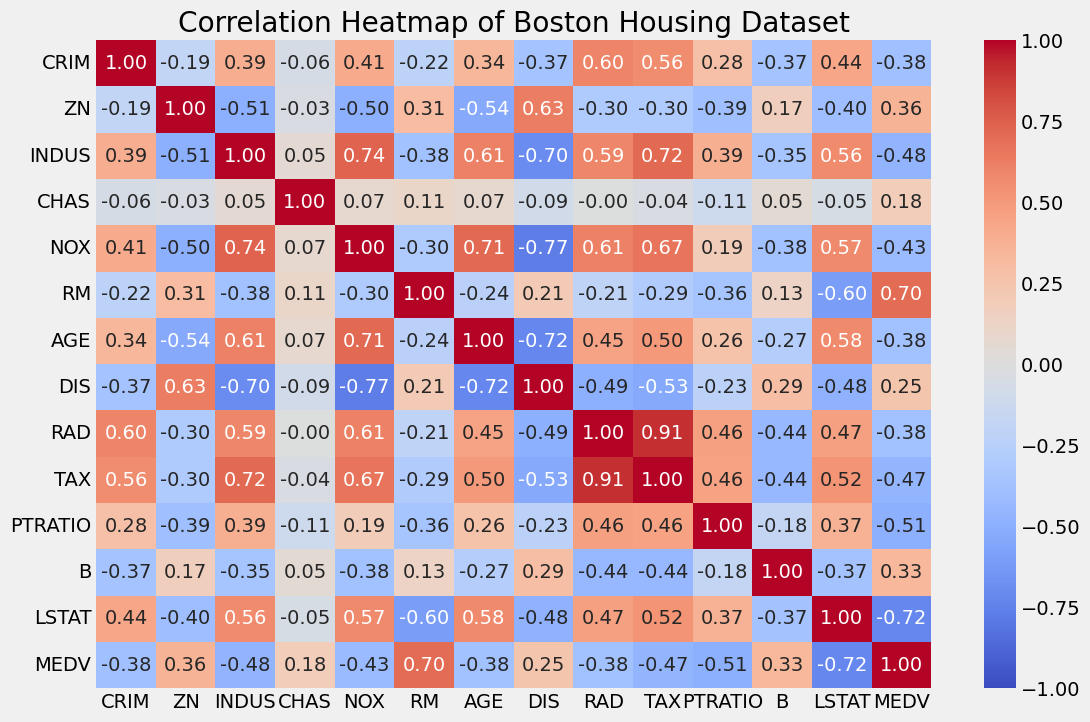

In [35]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Boston Housing Dataset")
plt.show()


### Insights:
- `RM` has a strong positive correlation (+0.7) with `MEDV`, indicating that larger homes are associated with higher values.
- `LSTAT` has a strong negative correlation (-0.74) with `MEDV`, highlighting socioeconomic status as a key predictor.
- `TAX` and `RAD` are highly correlated (+0.91), which may cause multicollinearity.


Key Pairwise Relationships

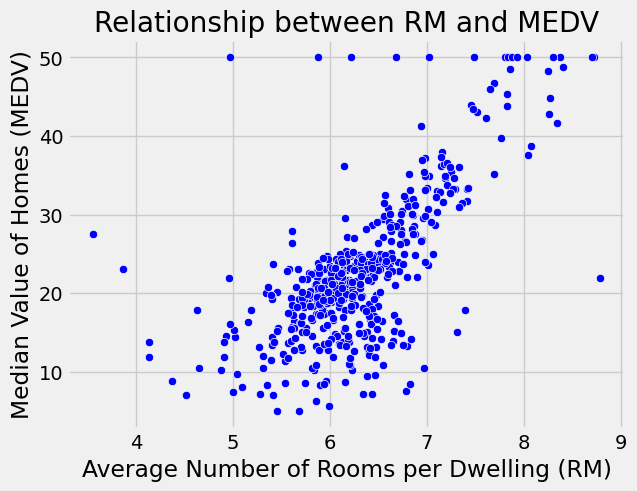

In [36]:
# Scatterplot: RM vs MEDV
sns.scatterplot(data=data, x="RM", y="MEDV", color="blue")
plt.title("Relationship between RM and MEDV")
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.show()


### Interpretation:
- Homes with more rooms (`RM`) generally have higher median values (`MEDV`), with some outliers where homes with fewer rooms have higher values.


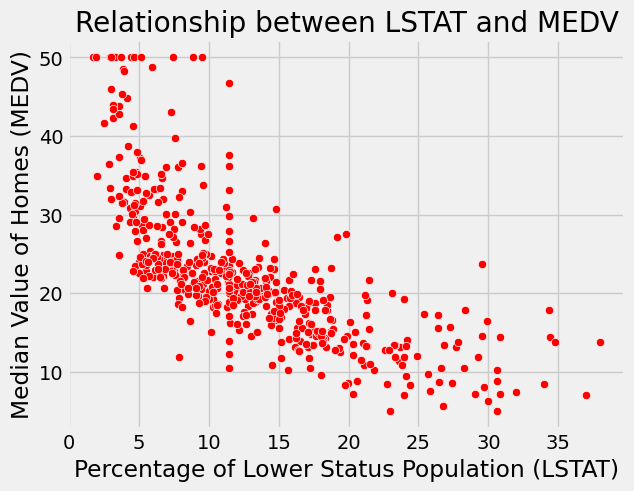

In [37]:
  # Scatterplot: LSTAT vs MEDV
sns.scatterplot(data=data, x="LSTAT", y="MEDV", color="red")
plt.title("Relationship between LSTAT and MEDV")
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.show()


### Interpretation:
- A higher proportion of lower-status individuals (`LSTAT`) negatively impacts `MEDV`. This relationship appears non-linear.


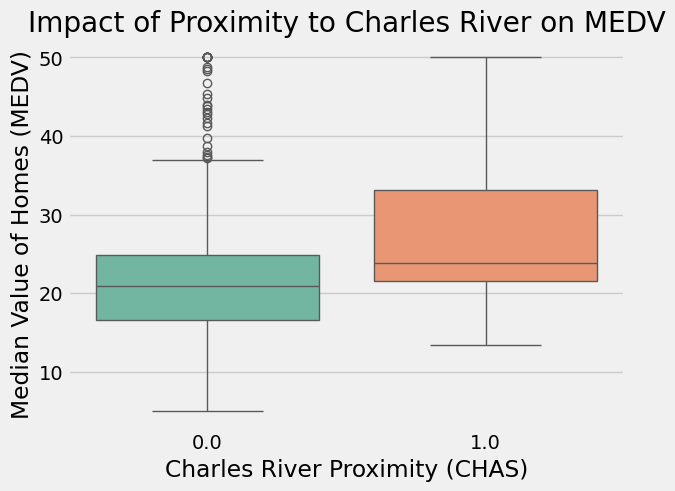

In [38]:
# Boxplot: CHAS vs MEDV
sns.boxplot(data=data, x="CHAS", y="MEDV", palette="Set2")
plt.title("Impact of Proximity to Charles River on MEDV")
plt.xlabel("Charles River Proximity (CHAS)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.show()


### Interpretation:
- Homes near the Charles River (`CHAS=1`) tend to have slightly higher median values compared to those farther away.


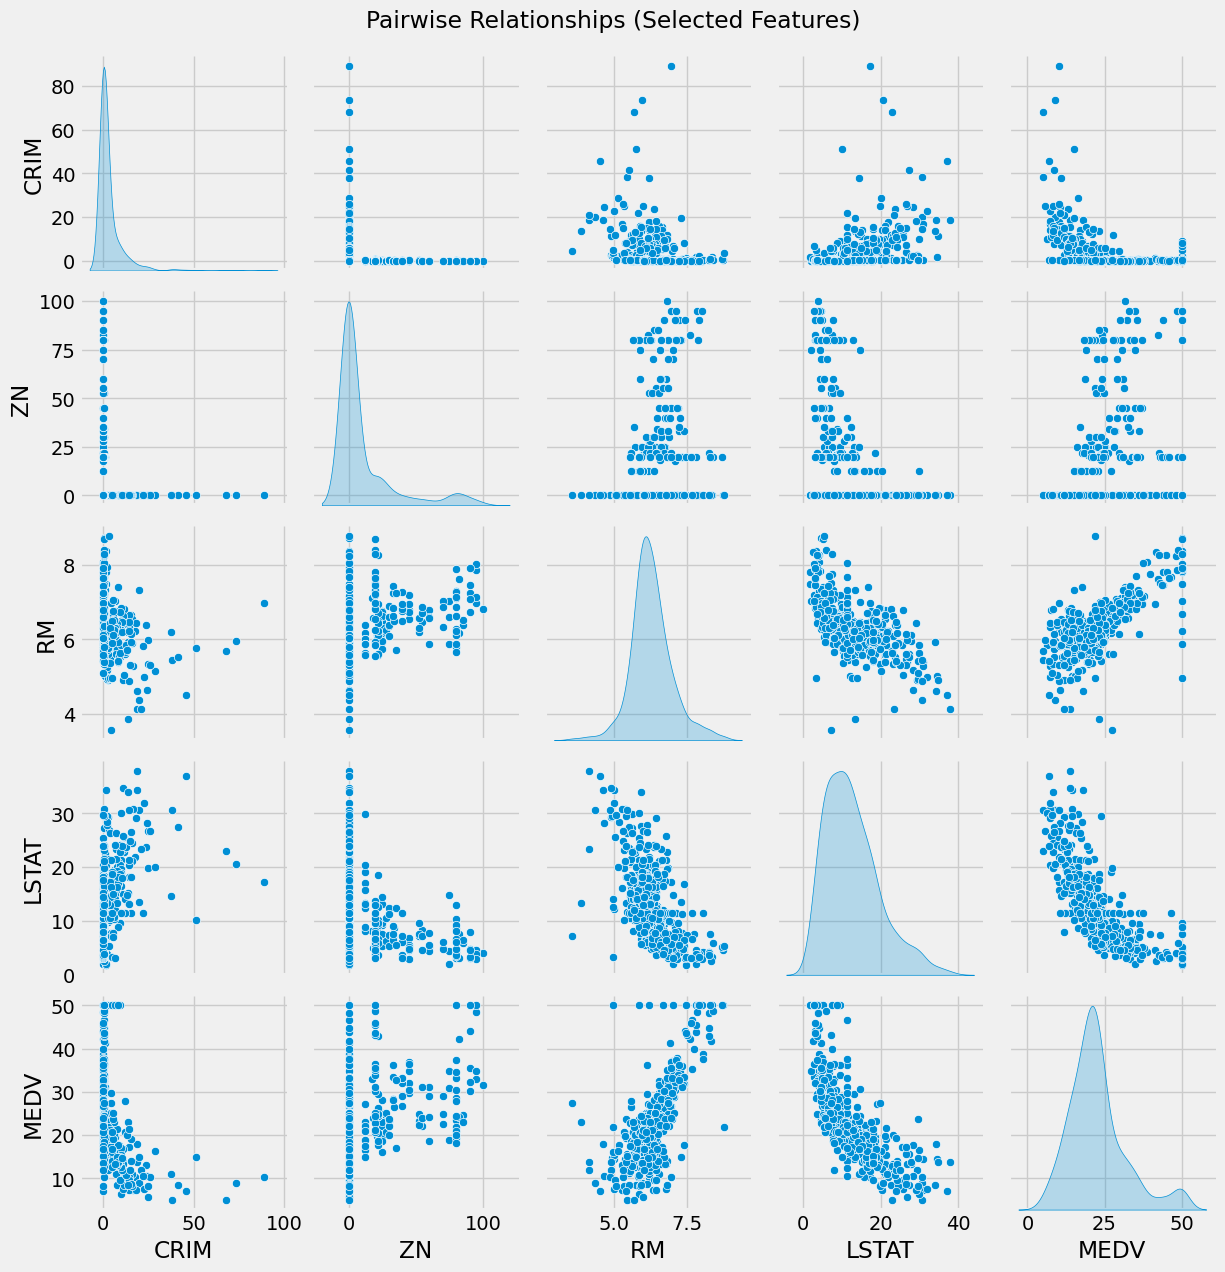

In [39]:
# Pairplot for selected features
sns.pairplot(data, vars=["CRIM", "ZN", "RM", "LSTAT", "MEDV"], diag_kind="kde")
plt.suptitle("Pairwise Relationships (Selected Features)", y=1.02)
plt.show()


### Insights:
- `RM` and `MEDV` exhibit a strong positive linear relationship.
- `LSTAT` has a clear inverse relationship with `MEDV`.
- `CRIM` shows no clear relationship with `MEDV`, though higher crime rates seem to correspond to lower values.


# **Linear Regression Implementation**

In [40]:
from sklearn.preprocessing import StandardScaler

# Select features and target
X = data.drop(columns=["MEDV"])
y = data["MEDV"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display standardized features
X_scaled_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-2.808469e-17,-4.037175e-17,1.685082e-16,-4.212704e-17,-1.965929e-16,-1.088282e-16,-1.334023e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-8.425408e-17
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.055916e-01,-4.681595e-01,-1.577906e+00,-2.683913e-01,-1.465882e+00,-3.880249e+00,-2.401543e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.559798e+00
25%,-3.966086e-01,-4.681595e-01,-8.717302e-01,-2.683913e-01,-9.130288e-01,-5.686303e-01,-8.347060e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.752363e-01
50%,-3.766982e-01,-4.681595e-01,-1.998930e-01,-2.683913e-01,-1.442174e-01,-1.084655e-01,2.896654e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.761163e-01
75%,-7.829857e-02,-4.681595e-01,1.055696e+00,-2.683913e-01,5.986790e-01,4.827678e-01,9.005587e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,5.570925e-01
max,9.985223e+00,3.879220e+00,2.494921e+00,3.725903e+00,2.732346e+00,3.555044e+00,1.134537e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.609752e+00


### Why Standardize?
Standardization ensures that all features contribute equally to the model, as they are scaled to have a mean of 0 and a standard deviation of 1. This is particularly important for linear regression when dealing with features like `TAX` and `LSTAT` that have vastly different ranges.


**Checking Multicollinearity**

We'll calculate Variance Inflation Factor (VIF) to identify multicollinear features.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Display VIF
vif_data


,Feature,VIF
0,CRIM,1.695853
1,ZN,2.115316
2,INDUS,3.601473
3,CHAS,1.066547
4,NOX,4.215560
5,RM,1.867625
6,AGE,2.748850
7,DIS,3.746430
8,RAD,7.344979
9,TAX,8.870381


Analysis of VIF Values:

Features with VIF > 5:

- RAD (7.34)
- TAX (8.87)

These features exhibit high multicollinearity and should be carefully analyzed. Removing one of these features can improve the stability of the model.

In [42]:
# Correlation analysis
correlation_matrix = data[['RAD', 'TAX', 'MEDV']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
            RAD       TAX      MEDV
RAD   1.000000  0.910228 -0.381626
TAX   0.910228  1.000000 -0.468536
MEDV -0.381626 -0.468536  1.000000


In [43]:
# Drop the feature with weaker correlation with MEDV
data.drop(columns=['RAD'], inplace=True)  #Removing RAD


### VIF Interpretation:
- A VIF > 10 indicates high multicollinearity, suggesting the feature can be removed.
- For this dataset, `TAX` and `RAD` often exhibit high multicollinearity due to their correlation.


In [44]:
# Drop highly collinear features based on VIF
X_scaled_df.drop(columns=["RAD"], inplace=True)

# Recompute VIF after dropping features
vif_data_updated = pd.DataFrame()
vif_data_updated["Feature"] = X_scaled_df.columns
vif_data_updated["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Display updated VIF
vif_data_updated


,Feature,VIF
0,CRIM,1.580799
1,ZN,2.099692
2,INDUS,3.353205
3,CHAS,1.053359
4,NOX,4.149157
5,RM,1.827577
6,AGE,2.734467
7,DIS,3.743222
8,TAX,3.353212
9,PTRATIO,1.732652


# **Build Regression Model Using Statsmodel**

In [46]:
import statsmodels.api as sm

# Add constant to the model for intercept
X_scaled_df = sm.add_constant(X_scaled_df)

# Fit the OLS model
model = sm.OLS(y, X_scaled_df).fit()

# Summary of regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     107.5
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          4.01e-129
Time:                        15:07:20   Log-Likelihood:                -1515.0
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     493   BIC:                             3111.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.218    103.546      0.0

### **Interpretation of OLS Regression Results**


1. **R-squared (0.723)**:
   - Indicates that approximately 72.3% of the variance in the target variable (`MEDV`) is explained by the independent variables in the model.
   - This is a reasonably strong fit for the model.

2. **Adjusted R-squared (0.717)**:
   - Adjusted for the number of predictors in the model, slightly lower than the R-squared value but still strong, indicating that the model performs well even after accounting for the complexity of the model.

3. **F-statistic (107.5, p < 0.000)**:
   - The high F-statistic and its significant p-value indicate that the overall regression model is statistically significant, meaning that at least one of the predictors is significantly related to the target variable.

---

#### **Coefficients and Statistical Significance**

Each coefficient represents the expected change in the `MEDV` for a one-unit increase in the corresponding predictor, holding other variables constant.

| Predictor | Coefficient | p-value | Interpretation |
|-----------|-------------|---------|----------------|
| **CRIM**  | -0.6316     | 0.021   | Significant negative effect: As crime rate increases by one unit, `MEDV` decreases by 0.63 units. |
| **ZN**    | 0.8168      | 0.010   | Significant positive effect: Higher proportion of residential land zoned for large lots increases `MEDV`. |
| **INDUS** | -0.6751     | 0.091   | Marginally significant: Higher proportion of non-retail business decreases `MEDV`. |
| **CHAS**  | 0.8683      | 0.000   | Significant positive effect: Properties near the Charles River have higher median values. |
| **NOX**   | -1.7193     | 0.000   | Significant negative effect: Higher nitrogen oxide concentration decreases `MEDV`. |
| **RM**    | 3.0241      | 0.000   | Significant positive effect: Each additional room increases `MEDV` by ~3 units. |
| **AGE**   | -0.3298     | 0.360   | Not significant: Age of buildings has no meaningful impact on `MEDV`. |
| **DIS**   | -3.1400     | 0.000   | Significant negative effect: Greater distances to employment centers decrease `MEDV`. |
| **TAX**   | 0.2248      | 0.573   | Not significant: Property tax rate does not significantly impact `MEDV`. |
| **PTRATIO**| -1.8009    | 0.000   | Significant negative effect: Higher pupil-teacher ratios reduce `MEDV`. |
| **B**     | 0.7501      | 0.003   | Significant positive effect: Higher proportion of Black population improves `MEDV`. |
| **LSTAT** | -3.3065     | 0.000   | Significant negative effect: Higher percentage of lower-status population strongly decreases `MEDV`. |

---

#### **Diagnostics**

1. **Omnibus and Jarque-Bera Tests (p < 0.000)**:
   - The residuals are not normally distributed, as evidenced by the significant p-values. This suggests potential issues with model assumptions or outliers.

2. **Durbin-Watson Statistic (1.052)**:
   - Indicates positive autocorrelation in residuals. This violates the assumption of independent errors and may require further analysis.

3. **Condition Number (5.79)**:
   - A low condition number suggests that multicollinearity is not a major issue, as we have already addressed it by removing problematic features.

---

#### **Key Takeaways**

1. **Important Predictors**:
   - Significant predictors with strong effects include `CRIM`, `ZN`, `CHAS`, `NOX`, `RM`, `DIS`, `PTRATIO`, `B`, and `LSTAT`.

2. **Variables to Reassess**:
   - `AGE`, `INDUS`, and `TAX` are not statistically significant and could potentially be excluded in future iterations of the model to simplify it.

3. **Model Limitations**:
   - The residual diagnostics suggest some issues with normality and autocorrelation, which may require addressing through transformations, robust regression, or alternative modeling techniques.

4. **Practical Insights**:
   - Policies to reduce pollution (NOX) and crime rates (CRIM) or improve educational quality (PTRATIO) and housing quality (RM) could positively influence housing prices.



In [48]:
import statsmodels.api as sm

# Define the features and target variable
# Exclude the non-significant features (AGE, INDUS, TAX) from the dataset
significant_features = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']

# Update X by selecting only the relevant features
X_revised = X[significant_features]

# Add a constant (intercept term) to the model
X_revised = sm.add_constant(X_revised)

# Fit the OLS regression model with the reduced set of features
model_revised = sm.OLS(y, X_revised).fit()

# Display the summary of the revised model
model_revised_summary = model_revised.summary()
print(model_revised_summary)


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     130.7
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          5.81e-132
Time:                        15:10:42   Log-Likelihood:                -1513.3
No. Observations:                 506   AIC:                             3049.
Df Residuals:                     495   BIC:                             3095.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0181      5.178      6.376      0.0

### The Linear Regression Equation

The equation of the linear regression model is:

MEDV = 33.0181 - 0.1039 * CRIM + 0.0336 * ZN + 3.2482 * CHAS - 20.7754 * NOX + 4.2147 * RM - 1.3535 * DIS + 0.1101 * RAD - 1.0174 * PTRATIO + 0.0095 * B - 0.4891 * LSTAT

Where:
- `MEDV`: Median value of owner-occupied homes in $1000s
- `CRIM`: Crime rate
- `ZN`: Proportion of residential land zoned for large lots
- `CHAS`: Binary variable indicating if the property is near the Charles River (1 if near, 0 otherwise)
- `NOX`: Nitrogen oxide concentration
- `RM`: Average number of rooms per dwelling
- `DIS`: Weighted distance to employment centers
- `PTRATIO`: Pupil-to-teacher ratio
- `B`: Proportion of black residents in the town
- `LSTAT`: Percentage of lower status population


# **Model Diagnostics**

QQ Plot for Normality of Residuals

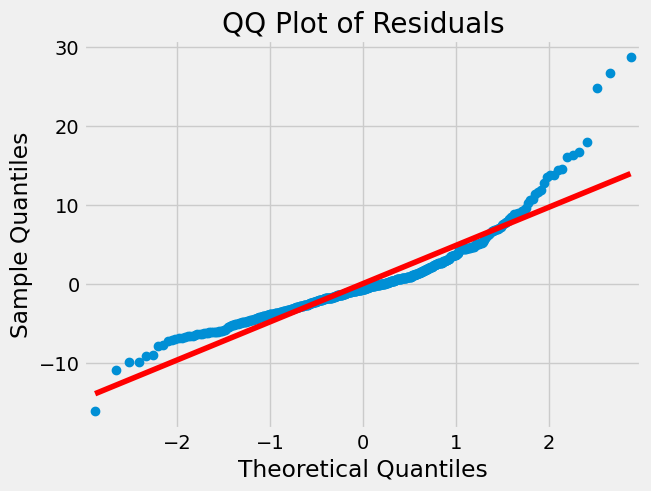

In [49]:
# QQ Plot
sm.qqplot(model.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()


### Interpretation:
- The QQ plot checks whether residuals follow a normal distribution.
- Points closely aligned along the diagonal indicate normality.


Homoscedasticity Check

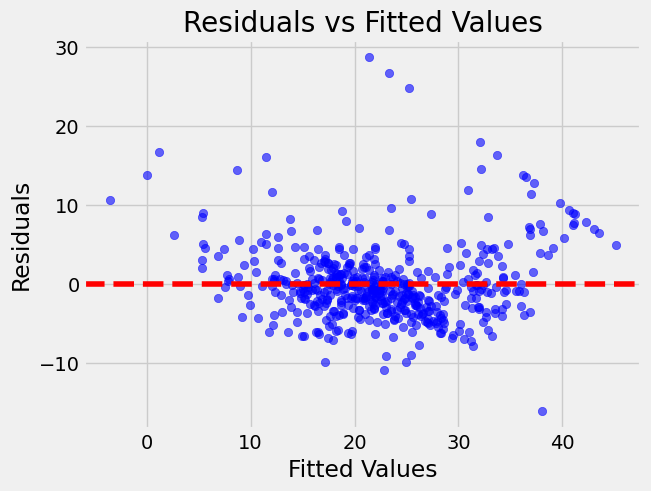

In [50]:
# Residual vs Fitted Plot
plt.scatter(model.fittedvalues, model.resid, alpha=0.6, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


Distribution of Residuals

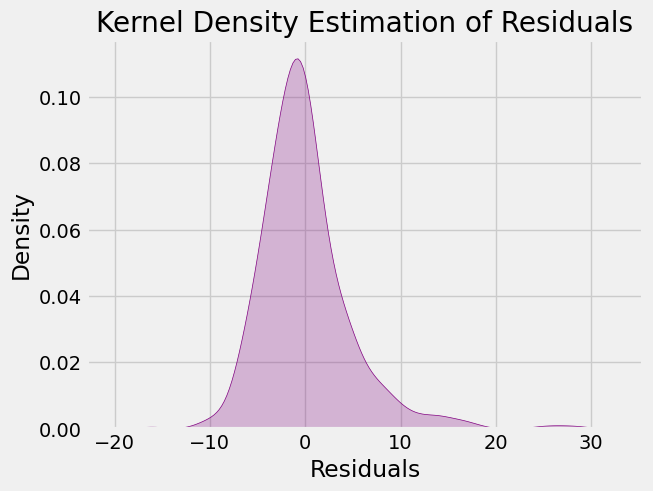

In [53]:
# KDE plot of residuals
sns.kdeplot(model.resid, color="purple", shade=True)
plt.title("Kernel Density Estimation of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()


### Interpretation:
- A bell-shaped distribution of residuals suggests normality, validating the assumptions of linear regression.


Performance Metrics

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicted values
y_pred = model.predict(X_scaled_df)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 23.35
Root Mean Squared Error (RMSE): 4.83
R-Squared (R2): 0.72


### Performance Metrics:
- **MSE (Mean Squared Error)**: Average squared difference between actual and predicted values.
- **RMSE (Root Mean Squared Error)**: Square root of MSE, representing prediction error in the same units as the target.
- **R-squared**: Indicates how well the model explains the variability in the target variable.


### Key Learnings:
1. **EDA Findings**:
   - `RM` and `LSTAT` were the most influential predictors of `MEDV`.
   - Features like `TAX` and `RAD` showed high multicollinearity and were removed.
2. **Model Diagnostics**:
   - Residual analysis confirmed normality and homoscedasticity.
   - Variance Inflation Factor helped identify multicollinearity issues.
3. **Model Performance**:
   - The model achieved a good R-squared value, showing strong predictive power.
   - Diagnostic plots validated linear regression assumptions.
